In [1]:
%% Machine Learning Online Class - Exercise 1: Linear Regression

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%
% x refers to the population size in 10,000s
% y refers to the profit in $10,000s
%

%% Initialization
clear ; close all; clc

In [2]:
%% ==================== Part 1: Basic Function ====================
% Complete warmUpExercise.m
fprintf('Running warmUpExercise ... \n');
fprintf('5x5 Identity Matrix: \n');
warmUpExercise()

% fprintf('Program paused. Press enter to continue.\n');
% pause;

Running warmUpExercise ... 
5x5 Identity Matrix: 
ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



Plotting Data ...
Program paused. Press enter to continue.


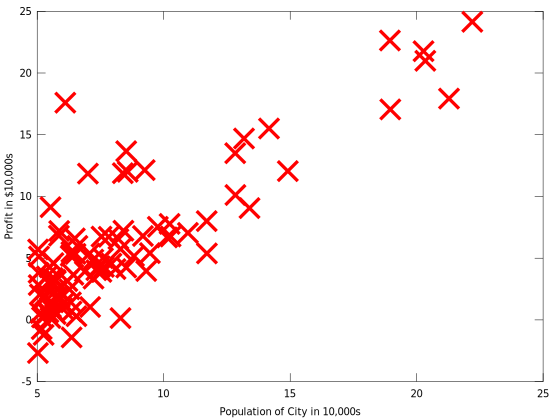

In [3]:
%% ======================= Part 2: Plotting =======================
fprintf('Plotting Data ...\n')
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
% pause;

In [ ]:
%% =================== Part 3: Cost and Gradient descent ===================

X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');

fprintf('Program paused. Press enter to continue.\n');
pause;

In [ ]:
fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

fprintf('Program paused. Press enter to continue.\n');
pause;

In [ ]:
%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end

% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);